# Prédiction des prix des maisons

In [89]:
# chargement des données 
import pandas as pd 
htrain = pd.read_csv('hprice_train.csv')
#print(htrain.head())
print(htrain.columns)
htrain.shape


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(1460, 81)

In [159]:
x_test = pd.read_csv('house_test.csv')

x_test = x_test[['MSSubClass','LotFrontage','LotArea','OverallQual','GarageArea','YearRemodAdd']]
x_test = x_test.fillna(s_test.median())
#x_test['YearBuilt']
print(x_test.columns)
print(x_test.shape)
x_test.describe()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'GarageArea',
       'YearRemodAdd'],
      dtype='object')
(1459, 6)


,MSSubClass,LotFrontage,LotArea,OverallQual,GarageArea,YearRemodAdd
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.645648,9819.161069,6.078821,472.773818,1983.662783
std,42.746880,20.561791,4955.517327,1.436812,216.974247,21.130467
min,20.000000,21.000000,1470.000000,1.000000,0.000000,1950.000000
25%,20.000000,60.000000,7391.000000,5.000000,318.000000,1963.000000
50%,50.000000,69.000000,9399.000000,6.000000,480.000000,1992.000000
75%,70.000000,78.000000,11517.500000,7.000000,576.000000,2004.000000
max,190.000000,200.000000,56600.000000,10.000000,1488.000000,2010.000000


In [148]:
#print(htrain.head())
htrain["YearBuilt"]
#htrain.describe()

0       1
1       3
2       1
3       7
4       1
5       1
6       1
7       3
8       6
9       5
10      3
11      1
12      3
13      1
14      3
15      6
16      3
17      3
18      1
19      5
20      1
21      6
22      1
23      3
24      3
25      1
26      5
27      1
28      5
29      6
       ..
1430    1
1431    3
1432    6
1433    1
1434    3
1435    3
1436    3
1437    1
1438    5
1439    3
1440    7
1441    1
1442    1
1443    7
1444    1
1445    3
1446    3
1447    1
1448    7
1449    3
1450    3
1451    1
1452    1
1453    1
1454    1
1455    1
1456    3
1457    5
1458    5
1459    3
Name: YearBuilt, Length: 1460, dtype: category
Categories (6, int64): [1 < 2 < 3 < 5 < 6 < 7]

In [106]:
#htrain.info()

# avec describe nous voyons que lotFrontage manque des valeurs que nous allons remplacer par la valeur mediane
htrain['LotFrontage'].unique
htrain['LotFrontage'] = htrain['LotFrontage'].fillna(htrain['LotFrontage'].median())
htrain['LotFrontage'].unique


<bound method Series.unique of 0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        69.0
8        51.0
9        50.0
10       70.0
11       85.0
12       69.0
13       91.0
14       69.0
15       51.0
16       69.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       69.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431     69.0
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441     69.0
1442     85.0
1443     69.0
1444     63.0
1445     70.0
1446     69.0
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64>

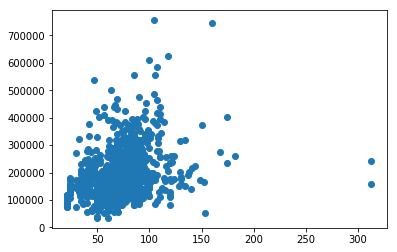

In [109]:
import matplotlib.pyplot as plt
plt.scatter(htrain['LotFrontage'], htrain['SalePrice'])
plt.show()

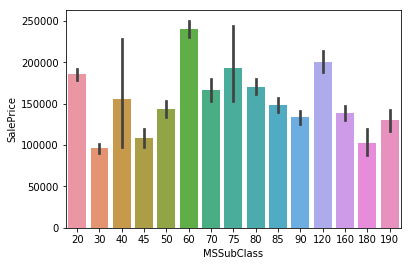

In [92]:
import seaborn as sns
sns.barplot(x='MSSubClass', y='SalePrice', data=htrain)

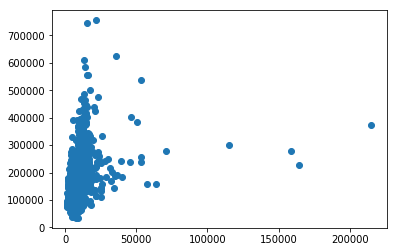

In [113]:
#dict of house year
plt.scatter(htrain['LotArea'], htrain['SalePrice'])


In [94]:
dtest=htrain.select_dtypes(include=['int64','float64']).head()
print(dtest)

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706    ...               0           61   
1          1976         0.0         978    ...             298            0   
2          2002       162.0         486    ...               0           42   
3          1970         0.0         216    ...               0           35   
4          2000       350.0         655    ...             192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  Po

In [100]:
#htrain['YearBuilt']

In [96]:
# calcule des ages des maisons
import datetime 
date = datetime.datetime.now()
htrain['YearBuilt'] = date.year - htrain['YearBuilt']
print(htrain.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [97]:
import pandas as pd
htrain['YearBuilt'] = htrain['YearBuilt'].astype('category')
#print(df_ht)
htrain['YearBuilt'] = htrain['YearBuilt'].cat.codes
#htrain.dtypes
htrain["YearBuilt"].unique


<bound method Series.unique of 0        7
1       34
2        9
3       92
4       10
5       17
6        6
7       37
8       76
9       69
10      45
11       5
12      48
13       4
14      50
15      78
16      40
17      43
18       6
19      52
20       5
21      77
22       8
23      34
24      42
25       3
26      59
27       3
28      53
29      80
        ..
1430     5
1431    34
1432    80
1433    10
1434    33
1435    48
1436    39
1437     2
1438    53
1439    31
1440    85
1441     6
1442     2
1443    91
1444     6
1445    44
1446    48
1447    15
1448    97
1449    40
1450    36
1451     2
1452     5
1453     4
1454     6
1455    11
1456    32
1457    67
1458    60
1459    45
Name: YearBuilt, Length: 1460, dtype: int8>

# traitement des données et visualisation

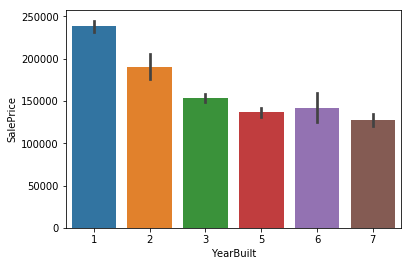

In [98]:
cat_year ={
    'dix':-10,
    'vingt':20,
    'quarante':30,
    'cinq':50,
    'sept':70,
    'huit':80,
    'cent':100
}
labels = [1,2,3,5,6,7]
htrain['YearBuilt'] = pd.cut(htrain['YearBuilt'], bins = list(cat_year.values()),labels=labels)
sns.barplot(x='YearBuilt',y='SalePrice', data=htrain)
# les maisons de plus 30 et 40 ans ont les prix sesiblement egaux


In [146]:
htest = htrain.drop(['SalePrice'], axis=1)
s_test = htest[['MSSubClass','LotFrontage','LotArea','OverallQual','GarageArea','YearRemodAdd']]
s_test = s_test.fillna(s_test.median())
#print(x_test)
#h_set=htest.describe()

# prediction

In [155]:
#from sklearn import linear_model
#from sklearn import datasets
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
model = linear_model.LinearRegression()
Y = htrain['SalePrice']
# prendre les 20% des données pour faire le test
X = s_test
#print(X)
model.fit(X,Y)
predit = model.predict(x_test)
#accuracy_score(Y, predit)
# traiter les données test pour changer les yearbuild en ages ancienneté


ValueError: Found input variables with inconsistent numbers of samples: [1460, 1459]